In [125]:
import pandas as pd
import numpy as np
import random
import math
from functools import reduce

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set_style('whitegrid')

# %matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True) #allows to work in a notebook
cf.go_offline() #allows cufflinks to work offline

import chart_studio.plotly as py
import plotly.graph_objs as go

import keras
from keras.models import Sequential
from keras.layers import Dense



import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
def autolabel(rects, ax, xpos='center', fontsize = 11):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize = fontsize)


In [208]:
#%%
# importing data and separating features / dependent variables

df = pd.read_excel("dl-dashboard-ay2019-2020-q1.xls", header = 4 ) 
df.head(20)


,"Data as of Oct 1, 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,,NaN,NaN,NaN,NaN,DL SUBSIDIZED,NaN,NaN,NaN,NaN,...,DL PARENT PLUS,NaN,NaN,NaN,NaN,DL GRAD PLUS,NaN,NaN,NaN,NaN
1,OPE ID,School,State,Zip Code,School Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,...,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
2,00100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,2587,2614,10820197,2614,5426322,...,837,851,12228044,851,6131002,122,128,982754,128,493128
3,00100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,943,947,2969661,979,1425663,...,138,145,1497367,145,748684,136,147,2853880,148,1429438
4,00100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,995,1015,4221927,1015,2112236,...,262,272,3471286,272,1735683,11,12,97832,12,48916
5,00100500,ALABAMA STATE UNIVERSITY,AL,361045714,Public,1807,1812,7869171,1819,3971102,...,453,468,6881617,469,3458242,69,70,786372,76,408307
6,00100700,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,350100000,Public,135,138,442997,138,198766,...,1,1,7725,1,3863,-,-,-,-,-
7,00100800,ATHENS STATE UNIVERSITY,AL,356111999,Public,1070,1070,4756424,1070,2534864,...,39,39,397692,39,199065,-,-,-,-,-
8,00100900,AUBURN UNIVERSITY,AL,368495113,Public,4980,4980,21512561,5022,11189698,...,1562,1580,40769458,1597,21105203,355,364,7026507,367,3624855
9,00101200,BIRMINGHAM-SOUTHERN COLLEGE,AL,352540002,Private-Nonprofit,382,382,1608770,383,804918,...,164,175,2776087,175,1428920,-,-,-,-,-


In [209]:
#%% concatenating two index rows

for col_num_i in range(5, df.shape[1]):
    df[f'Unnamed: {col_num_i}'][1] = df[f'Unnamed: {col_num_i}'][1] +' - ' + df[f'Unnamed: {math.floor(col_num_i / 5)*5}'][0] 
 #   print(df[f'Unnamed: {math.floor(col_num_i / 5)*5}'][0])        
 #   print(df[f'Unnamed: {col_num_i}'][1])

In [210]:
#%%
new_header = df.iloc[1]
df = df.drop([0, 1])
df.columns = new_header

In [211]:
df_copy = df

In [232]:
df_copy

1,index,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,...,Recipients - DL PARENT PLUS,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements - DL PARENT PLUS,$ of Disbursements - DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements - DL GRAD PLUS,$ of Disbursements - DL GRAD PLUS
0,2,00100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,2587,2614,10820197,2614,...,837,851,12228044,851,6131002,122,128,982754,128,493128
1,3,00100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,943,947,2969661,979,...,138,145,1497367,145,748684,136,147,2853880,148,1429438
2,4,00100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,995,1015,4221927,1015,...,262,272,3471286,272,1735683,11,12,97832,12,48916
3,5,00100500,ALABAMA STATE UNIVERSITY,AL,361045714,Public,1807,1812,7869171,1819,...,453,468,6881617,469,3458242,69,70,786372,76,408307
4,6,00100700,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,350100000,Public,135,138,442997,138,...,1,1,7725,1,3863,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,4441,04283200,DELUXE BARBER COLLEGE,TX,782172118,Proprietary,5,5,17500,5,...,-,-,-,-,-,-,-,-,-,-
4152,4442,04283300,A BETTER U BEAUTY BARBER ACADEMY,NM,871103128,Proprietary,2,2,6572,3,...,-,-,-,-,-,-,-,-,-,-
4153,4443,04283500,FALCON INSTITUTE OF HEALTH AND SCIENCE,PA,180172113,Proprietary,2,2,6297,2,...,-,-,-,-,-,-,-,-,-,-
4154,4444,04283600,COLLEGE UNBOUND,RI,029052340,Private-Nonprofit,54,54,208576,54,...,-,-,-,-,-,-,-,-,-,-


# DL SUBSIDIZED

In [67]:
df['$ of Disbursements - DL SUBSIDIZED'][729]

' -'

In [68]:
#%%
for row_num in range(2,df.shape[0]):
    if df['$ of Loans Originated - DL SUBSIDIZED'][row_num] == ' -':
 #       print(f'{row_num} here')
 #       df['$ of Loans Originated - DL SUBSIDIZED'][row_num] = 0
        df.drop([row_num], inplace = True)

df.reset_index(level=0, inplace=True)

In [69]:
      
df_subsidized = df.groupby(['State']).agg({'School':['count'],
                                           'Recipients - DL SUBSIDIZED' : ['sum'],
                                           '# of Loans Originated - DL SUBSIDIZED' : ['sum'],
                                           '$ of Loans Originated - DL SUBSIDIZED' : ['sum'],
                                           '# of Disbursements - DL SUBSIDIZED' : ['sum'],
                                           '$ of Disbursements - DL SUBSIDIZED' : ['sum']})
#%%
df_subsidized.reset_index(level=0, inplace=True)
df_subsidized.columns = df_subsidized.columns.droplevel(1)

In [70]:
df_subsidized

,State,School,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,$ of Disbursements - DL SUBSIDIZED
0,AK,7,2894,2912,11445154,2912,6082446
1,AL,58,61329,61929,254302237,62725,125629240
2,AR,67,30674,31172,122844178,31517,61626183
3,AZ,58,97188,98025,392265743,100062,198051799
4,CA,415,229245,232044,981050427,234288,467089691
5,CO,68,57261,58103,223448409,59625,111054812
6,CT,41,40305,40492,171222206,41318,85037548
7,DC,13,23964,24005,97433168,24035,41571608
8,DE,13,7656,7699,32762102,7703,16592108
9,FL,190,137606,139453,482039319,143683,281561739


In [71]:
#%% getting averages
df_subsidized['Average $ of loans Originated per recipient - DL SUBSIDIZED'] = df_subsidized['$ of Loans Originated - DL SUBSIDIZED'] / df_subsidized['Recipients - DL SUBSIDIZED']


In [72]:
#%% getting averages
df_subsidized['Average $ of Disbursements per recipient - DL SUBSIDIZED'] = df_subsidized['$ of Disbursements - DL SUBSIDIZED'] / df_subsidized['Recipients - DL SUBSIDIZED']


In [73]:
df_subsidized['Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED'] = (df_subsidized['Average $ of Disbursements per recipient - DL SUBSIDIZED'] * 100)/ df_subsidized['Average $ of loans Originated per recipient - DL SUBSIDIZED']

In [74]:
df_subsidized.head()

,State,School,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,$ of Disbursements - DL SUBSIDIZED,Average $ of loans Originated per recipient - DL SUBSIDIZED,Average $ of Disbursements per recipient - DL SUBSIDIZED,Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED
0,AK,7,2894,2912,11445154,2912,6082446,3954.787146,2101.743607,53.144291
1,AL,58,61329,61929,254302237,62725,125629240,4146.525086,2048.447553,49.401547
2,AR,67,30674,31172,122844178,31517,61626183,4004.830736,2009.069016,50.166141
3,AZ,58,97188,98025,392265743,100062,198051799,4036.154083,2037.821531,50.489191
4,CA,415,229245,232044,981050427,234288,467089691,4279.484512,2037.513102,47.611181


In [75]:
#%%

fig = go.Figure(data=go.Choropleth(locations=df_subsidized['State'], # Spatial coordinates
                                   z = df_subsidized['Average $ of loans Originated per recipient - DL SUBSIDIZED'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'viridis',
                                   colorbar_title = "USD"))

fig.update_layout(title_text = 'Average $ of loans Originated per recipient - DL SUBSIDIZED',
                  geo_scope='usa') # limite map scope to USA


fig.show()

In [76]:
#%%

fig = go.Figure(data=go.Choropleth(locations=df_subsidized['State'], # Spatial coordinates
                                   z = df_subsidized['Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'reds',
                                   colorbar_title = "% of Offered"))

fig.update_layout(title_text = 'Average $ of loans Originated per recipient - DL SUBSIDIZED',
                  geo_scope='usa') # limite map scope to USA


fig.show()

# DL PARENT PLUS

In [78]:

for row_num in range(2,df.shape[0]):
    if (df['$ of Disbursements - DL PARENT PLUS'][row_num] == " -") or (df['$ of Disbursements - DL PARENT PLUS'][row_num] == "- "):
 #       print(f'{row_num} here')
 #       df['$ of Disbursements - DL SUBSIDIZED'][row_num] = 0
        df.drop([row_num], inplace = True)

#  df.reset_index(level=0, inplace=True)

In [79]:
df_parent = df.groupby(['State']).agg({'School':['count'],
                                       'Recipients - DL PARENT PLUS' : ['sum'],
                                       '# of Loans Originated - DL PARENT PLUS' : ['sum'],
                                       '$ of Loans Originated - DL PARENT PLUS' : ['sum'],
                                       '# of Disbursements - DL PARENT PLUS' : ['sum'],
                                       '$ of Disbursements - DL PARENT PLUS' : ['sum']})
#%%
df_parent.reset_index(level=0, inplace=True)
df_parent.columns = df_parent.columns.droplevel(1)

In [80]:
df_parent.head()

,State,School,Recipients - DL PARENT PLUS,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements - DL PARENT PLUS,$ of Disbursements - DL PARENT PLUS
0,AK,5,107,108,1524243,108,824666
1,AL,41,13952,14322,266426495,14381,136589067
2,AR,38,4513,4657,59363667,4694,30790110
3,AZ,38,15190,15598,264442125,15848,134682082
4,CA,260,39606,41194,797435312,41518,375267365


In [81]:
df_parent['Average $ of Disbursements per recipient - DL PARENT PLUS'] = df_parent['$ of Disbursements - DL PARENT PLUS'] / df_parent['Recipients - DL PARENT PLUS']
df_parent['Average $ of Loans Originated per recipient - DL PARENT PLUS'] = df_parent['$ of Loans Originated - DL PARENT PLUS'] / df_parent['Recipients - DL PARENT PLUS']

df_parent['Average % of Disbursements to Loans Originated per recipient - DL PARENT PLUS'] = (df_parent['Average $ of Disbursements per recipient - DL PARENT PLUS'] * 100)/ df_parent['Average $ of Loans Originated per recipient - DL PARENT PLUS']

In [82]:
#%%

fig = go.Figure(data=go.Choropleth(locations=df_parent['State'], # Spatial coordinates
                                   z = df_parent['Average $ of Loans Originated per recipient - DL PARENT PLUS'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'viridis',
                                   colorbar_title = "USD"))

fig.update_layout(title_text = 'Average $ of loans Originated per recipient - DL PARENT PLUS',
                  geo_scope='usa') # limite map scope to USA


fig.show()

In [83]:
#%%

fig = go.Figure(data=go.Choropleth(locations=df_parent['State'], # Spatial coordinates
                                   z = df_parent['Average % of Disbursements to Loans Originated per recipient - DL PARENT PLUS'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'reds',
                                   colorbar_title = "% of Offered Amount"))

fig.update_layout(title_text = 'Average % of loans Originated per recipient - DL PARENT PLUS',
                  geo_scope='usa') # limite map scope to USA


fig.show()

# DL UNSUBSIDIZED - UNDERGRADUATE

In [101]:
df = df_copy


for row_num in range(2,df.shape[0]):
    if (df['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'][row_num] == " -") or (df['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'][row_num] == "-"):
        df.drop([row_num], inplace = True)

df.reset_index(level=0, inplace=True)

In [102]:
df_unsub_ug = df.groupby(['State']).agg({'School':['count'],
                                       'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '# of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum']})
#%%
df_unsub_ug.reset_index(level=0, inplace=True)
df_unsub_ug.columns = df_unsub_ug.columns.droplevel(1)

In [103]:
df_unsub_ug.head()

,State,School,Recipients - DL UNSUBSIDIZED - UNDERGRADUATE,# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,# of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE
0,AK,7,2829,2843,14636050,2845,7735818
1,AL,57,64460,67579,266224989,68441,129505276
2,AR,68,31446,33640,137286100,34034,68827306
3,AZ,59,92516,94639,451529705,98127,228462843
4,CA,414,190910,195654,778162473,197979,376946878


In [104]:
df_unsub_ug['Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = df_unsub_ug['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'] / df_unsub_ug['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE']
df_unsub_ug['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = df_unsub_ug['$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'] / df_unsub_ug['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE']

df_unsub_ug['Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = (df_unsub_ug['Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] * 100)/ df_unsub_ug['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']

In [105]:
df_unsub_ug.head()

,State,School,Recipients - DL UNSUBSIDIZED - UNDERGRADUATE,# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,# of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE
0,AK,7,2829,2843,14636050,2845,7735818,2734.470838,5173.577236,52.854548
1,AL,57,64460,67579,266224989,68441,129505276,2009.079677,4130.080500,48.645049
2,AR,68,31446,33640,137286100,34034,68827306,2188.745977,4365.773071,50.134213
3,AZ,59,92516,94639,451529705,98127,228462843,2469.441426,4880.558012,50.597522
4,CA,414,190910,195654,778162473,197979,376946878,1974.474244,4076.069734,48.440639


In [106]:
fig = go.Figure(data=go.Choropleth(locations=df_unsub_ug['State'], # Spatial coordinates
                                   z = df_unsub_ug['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'viridis',
                                   colorbar_title = "USD"))

fig.update_layout(title_text = 'Average $ of loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE',
                  geo_scope='usa') # limite map scope to USA


fig.show()

In [107]:
fig = go.Figure(data=go.Choropleth(locations=df_unsub_ug['State'], # Spatial coordinates
                                   z = df_unsub_ug['Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'reds',
                                   colorbar_title = "% of Offered Amount"))

fig.update_layout(title_text = 'Average % of loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE',
                  geo_scope='usa') # limite map scope to USA


fig.show()

# Total Undergraduate Loans

In [128]:
data_frames = [df_subsidized[['State', 'Average $ of loans Originated per recipient - DL SUBSIDIZED']], df_unsub_ug[['State', 'Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']], df_parent[['State', 'Average $ of Loans Originated per recipient - DL PARENT PLUS']]]

In [129]:
df_ave_rec = reduce(lambda  left,right: pd.merge(left,right,on=['State'],
                                            how='outer'), data_frames)

In [159]:
df_ave_rec['Total Average $ of Loans per Recipient'] = df_ave_rec.iloc[:,1:4].sum(axis = 1)

In [179]:
df_ave_rec.head(53)

,State,Average $ of loans Originated per recipient - DL SUBSIDIZED,Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Loans Originated per recipient - DL PARENT PLUS,Total Average $ of Loans per Recipient
0,AK,3954.787146,5173.577236,14245.261682,23373.626064
1,AL,4146.525086,4130.080500,19095.935708,27372.541294
2,AR,4004.830736,4365.773071,13153.925770,21524.529577
3,AZ,4036.154083,4880.558012,17408.961488,26325.673582
4,CA,4279.484512,4076.069734,20134.204716,28489.758963
5,CO,3902.279195,4540.047430,19593.142857,28035.469483
6,CT,4248.162908,3855.302650,20076.075286,28179.540844
7,DC,4065.814054,4702.445923,27417.093449,36185.353426
8,DE,4279.271421,3569.995339,23149.129911,30998.396672
9,FL,3503.039976,3824.280644,18205.714936,25533.035557


In [161]:
fig = go.Figure(data=go.Choropleth(locations=df_ave_rec['State'], # Spatial coordinates
                                   z = df_ave_rec['Total Average $ of Loans per Recipient'].astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   colorscale = 'viridis',
                                   colorbar_title = "USD"))

fig.update_layout(title_text = 'Total Average $ of Loans per Recipient',
                  geo_scope='usa') # limite map scope to USA


fig.show()

In [178]:
mean_am = df_ave_rec['Total Average $ of Loans per Recipient'].mean()
min_am = df_ave_rec['Total Average $ of Loans per Recipient'].min()
min_state = df_ave_rec['State'][df_ave_rec['Total Average $ of Loans per Recipient'].idxmin(axis = 0)]
max_am = df_ave_rec['Total Average $ of Loans per Recipient'].max()
max_state = df_ave_rec['State'][df_ave_rec['Total Average $ of Loans per Recipient'].idxmax(axis = 0)]
print(f'Mean Loan Amount per year USA - {round(mean_am)}')
print(f'\nMin Loan Amount per year is {round(min_am)} in {min_state}')
print(f'\nMax Loan Amount per year is {round(max_am)} in {max_state}')

Mean Loan Amount per year USA - 25174.0

Min Loan Amount per year is 16728.0 in PR

Max Loan Amount per year is 36185.0 in DC


# DL SUBSIDIZED

In [186]:
df = df_copy


for row_num in range(2,df.shape[0]):
    if (df['$ of Disbursements - DL SUBSIDIZED'][row_num] == " -") or (df['$ of Disbursements - DL SUBSIDIZED'][row_num] == "-"):
        df.drop([row_num], inplace = True)

df.reset_index(level=0, inplace=True)
df.head()

1,index,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,...,Recipients - DL PARENT PLUS,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements - DL PARENT PLUS,$ of Disbursements - DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements - DL GRAD PLUS,$ of Disbursements - DL GRAD PLUS
0,2,00100200,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY,AL,357621357,Public,2587,2614,10820197,2614,...,837,851,12228044,851,6131002,122,128,982754,128,493128
1,3,00100300,FAULKNER UNIVERSITY,AL,361093398,Private-Nonprofit,943,947,2969661,979,...,138,145,1497367,145,748684,136,147,2853880,148,1429438
2,4,00100400,UNIVERSITY OF MONTEVALLO,AL,351156000,Public,995,1015,4221927,1015,...,262,272,3471286,272,1735683,11,12,97832,12,48916
3,5,00100500,ALABAMA STATE UNIVERSITY,AL,361045714,Public,1807,1812,7869171,1819,...,453,468,6881617,469,3458242,69,70,786372,76,408307
4,6,00100700,CENTRAL ALABAMA COMMUNITY COLLEGE,AL,350100000,Public,135,138,442997,138,...,1,1,7725,1,3863,-,-,-,-,-


In [187]:
df_sub_pr = df.groupby(['School Type']).agg({'School':['count'],
                                       'Recipients - DL SUBSIDIZED' : ['sum'],
                                       '# of Loans Originated - DL SUBSIDIZED' : ['sum'],
                                       '$ of Loans Originated - DL SUBSIDIZED' : ['sum'],
                                       '# of Disbursements - DL SUBSIDIZED' : ['sum'],
                                       '$ of Disbursements - DL SUBSIDIZED' : ['sum']})
#%%
df_sub_pr.reset_index(level=0, inplace=True)
df_sub_pr.columns = df_sub_pr.columns.droplevel(1)
df_sub_pr.head()

,School Type,School,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,$ of Disbursements - DL SUBSIDIZED
0,Foreign-Private,39,677,677,3010217,681,1535358
1,Foreign-Public,121,1557,1560,6749666,1562,3271412
2,Private-Nonprofit,1264,891792,898759,3783731343,926652,1872030719
3,Proprietary,1423,203981,205496,717323159,228060,338223772
4,Public,1285,2019194,2052378,8202860261,2068143,4145046880


In [188]:
df_sub_pr['Average $ of Disbursements per recipient - DL SUBSIDIZED'] = df_sub_pr['$ of Disbursements - DL SUBSIDIZED'] / df_sub_pr['Recipients - DL SUBSIDIZED']
df_sub_pr['Average $ of Loans Originated per recipient - DL SUBSIDIZED'] = df_sub_pr['$ of Loans Originated - DL SUBSIDIZED'] / df_sub_pr['Recipients - DL SUBSIDIZED']

df_sub_pr['Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED'] = (df_sub_pr['Average $ of Disbursements per recipient - DL SUBSIDIZED'] * 100)/ df_sub_pr['Average $ of Loans Originated per recipient - DL SUBSIDIZED']

In [189]:
df_sub_pr.head()

,School Type,School,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,$ of Disbursements - DL SUBSIDIZED,Average $ of Disbursements per recipient - DL SUBSIDIZED,Average $ of Loans Originated per recipient - DL SUBSIDIZED,Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED
0,Foreign-Private,39,677,677,3010217,681,1535358,2267.884786,4446.406204,51.004894
1,Foreign-Public,121,1557,1560,6749666,1562,3271412,2101.099550,4335.045601,48.467761
2,Private-Nonprofit,1264,891792,898759,3783731343,926652,1872030719,2099.178641,4242.840643,49.475783
3,Proprietary,1423,203981,205496,717323159,228060,338223772,1658.114099,3516.617523,47.150823
4,Public,1285,2019194,2052378,8202860261,2068143,4145046880,2052.822502,4062.442866,50.531726


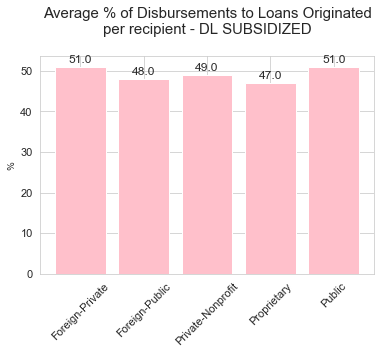

In [289]:
fig, axe = plt.subplots()
plt1 = axe.bar(df_sub_pr['School Type'], round(df_sub_pr['Average % of Disbursements to Loans Originated per recipient - DL SUBSIDIZED']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt1, axe, "center", 12)
axe.set_ylabel('%')
axe.set_title('Average % of Disbursements to Loans Originated\nper recipient - DL SUBSIDIZED\n', fontsize=15)
plt.show()

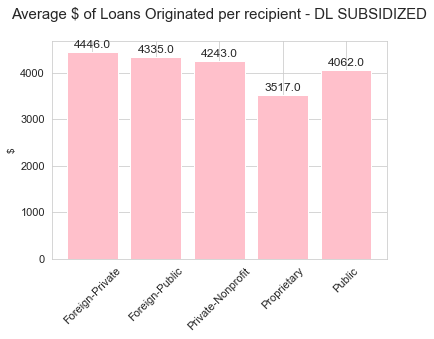

In [307]:
fig, axe = plt.subplots()
plt2 = axe.bar(df_sub_pr['School Type'], round(df_sub_pr['Average $ of Loans Originated per recipient - DL SUBSIDIZED']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt2, axe, "center", 12)
axe.set_ylabel('$')
axe.set_title('Average $ of Loans Originated per recipient - DL SUBSIDIZED\n', fontsize=15)
plt.show()

# parent plus

In [200]:
df = df_copy
for row_num in range(2,df.shape[0]):
    if (df['$ of Disbursements - DL PARENT PLUS'][row_num] == " -") or (df['$ of Disbursements - DL PARENT PLUS'][row_num] == "- "):
 #       print(f'{row_num} here')
 #       df['$ of Disbursements - DL SUBSIDIZED'][row_num] = 0
        df.drop([row_num], inplace = True)

#  df.reset_index(level=0, inplace=True)

In [203]:
df_parent_pr = df.groupby(['School Type']).agg({'School':['count'],
                                       'Recipients - DL PARENT PLUS' : ['sum'],
                                       '# of Loans Originated - DL PARENT PLUS' : ['sum'],
                                       '$ of Loans Originated - DL PARENT PLUS' : ['sum'],
                                       '# of Disbursements - DL PARENT PLUS' : ['sum'],
                                       '$ of Disbursements - DL PARENT PLUS' : ['sum']})
#%%
df_parent_pr.reset_index(level=0, inplace=True)
df_parent_pr.columns = df_parent_pr.columns.droplevel(1)

In [204]:
df_parent_pr['Average $ of Disbursements per recipient - DL PARENT PLUS'] = df_parent_pr['$ of Disbursements - DL PARENT PLUS'] / df_parent_pr['Recipients - DL PARENT PLUS']
df_parent_pr['Average $ of Loans Originated per recipient - DL PARENT PLUS'] = df_parent_pr['$ of Loans Originated - DL PARENT PLUS'] / df_parent_pr['Recipients - DL PARENT PLUS']

df_parent_pr['Average % of Disbursements to Loans Originated per recipient - DL PARENT PLUS'] = (df_parent_pr['Average $ of Disbursements per recipient - DL PARENT PLUS'] * 100)/ df_parent_pr['Average $ of Loans Originated per recipient - DL PARENT PLUS']

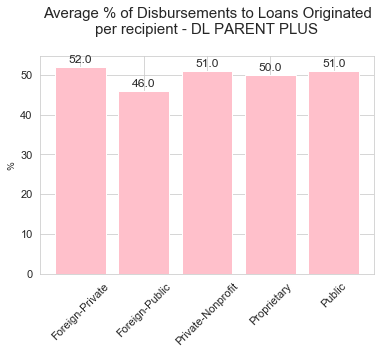

In [297]:
fig, axe = plt.subplots()
plt3 = axe.bar(df_parent_pr['School Type'], round(df_parent_pr['Average % of Disbursements to Loans Originated per recipient - DL PARENT PLUS']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt3, axe, "center", 12)
axe.set_ylabel('%')
axe.set_title('Average % of Disbursements to Loans Originated\nper recipient - DL PARENT PLUS\n', fontsize=15)
plt.show()

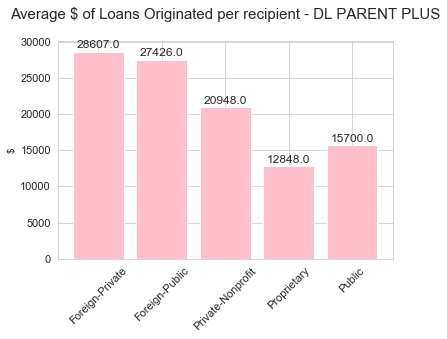

In [299]:
fig, axe = plt.subplots()
pl4 = axe.bar(df_parent_pr['School Type'], round(df_parent_pr['Average $ of Loans Originated per recipient - DL PARENT PLUS']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(pl4, axe, "center", 12)
axe.set_ylabel('$')
axe.set_title('Average $ of Loans Originated per recipient - DL PARENT PLUS\n', fontsize=15)
plt.show()

# DL UNSUBSIDIZED - UNDERGRADUATE

In [212]:
df = df_copy


for row_num in range(2,df.shape[0]):
    if (df['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'][row_num] == " -") or (df['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'][row_num] == "-"):
        df.drop([row_num], inplace = True)

df.reset_index(level=0, inplace=True)

In [213]:
df_unsub_ug_pr = df.groupby(['School Type']).agg({'School':['count'],
                                       'Recipients - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '# of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum'],
                                       '$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE' : ['sum']})
#%%
df_unsub_ug_pr.reset_index(level=0, inplace=True)
df_unsub_ug_pr.columns = df_unsub_ug_pr.columns.droplevel(1)

In [215]:
df_unsub_ug_pr['Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = df_unsub_ug_pr['$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE'] / df_unsub_ug_pr['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE']
df_unsub_ug_pr['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = df_unsub_ug_pr['$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE'] / df_unsub_ug_pr['Recipients - DL UNSUBSIDIZED - UNDERGRADUATE']

df_unsub_ug_pr['Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] = (df_unsub_ug_pr['Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE'] * 100)/ df_unsub_ug_pr['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']

In [216]:
df_unsub_ug_pr.head()

,School Type,School,Recipients - DL UNSUBSIDIZED - UNDERGRADUATE,# of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Loans Originated - DL UNSUBSIDIZED - UNDERGRADUATE,# of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE,$ of Disbursements - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Disbursements per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE
0,Foreign-Private,39,719,720,2324188,725,1184770,1647.802503,3232.528512,50.975653
1,Foreign-Public,126,1878,1885,7332111,1888,3564994,1898.292865,3904.212460,48.621659
2,Private-Nonprofit,1285,943811,978563,3604639392,1008083,1764596633,1869.650420,3819.238589,48.953486
3,Proprietary,1421,215714,220826,1022792268,248043,474554647,2199.925118,4741.427390,46.397950
4,Public,1285,2033863,2128093,8454547764,2143350,4270478086,2099.688173,4156.891474,50.511017


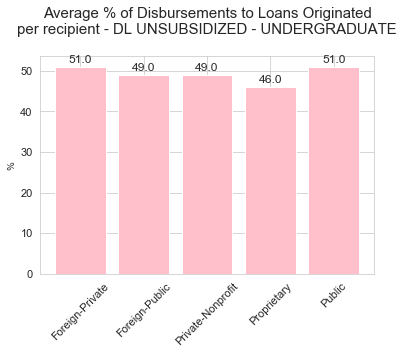

In [303]:
fig, axe = plt.subplots()
plt5 = axe.bar(df_unsub_ug_pr['School Type'], round(df_unsub_ug_pr['Average % of Disbursements to Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt5, axe, "center", 12)
axe.set_ylabel('%')
axe.set_title('Average % of Disbursements to Loans Originated\nper recipient - DL UNSUBSIDIZED - UNDERGRADUATE\n', fontsize=15)
plt.show()

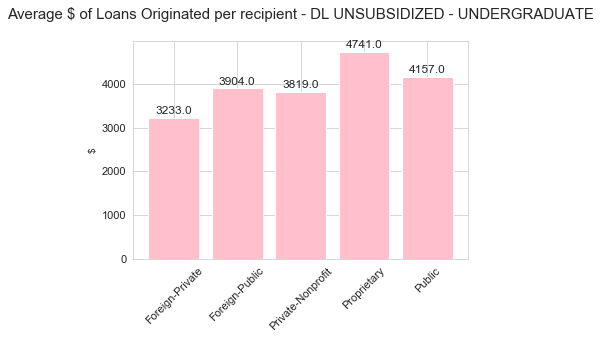

In [304]:
fig, axe = plt.subplots()
plt6 = axe.bar(df_unsub_ug_pr['School Type'], round(df_unsub_ug_pr['Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt6, axe, "center", 12)
axe.set_ylabel('$')
axe.set_title('Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE\n', fontsize=15)
plt.show()

# Total Undergraduate Loans

In [221]:
data_frames = [df_sub_pr[['School Type', 'Average $ of Loans Originated per recipient - DL SUBSIDIZED']], df_unsub_ug_pr[['School Type', 'Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE']], df_parent_pr[['School Type', 'Average $ of Loans Originated per recipient - DL PARENT PLUS']]]

In [222]:
df_ave_rec_pr = reduce(lambda  left,right: pd.merge(left,right,on=['School Type'],
                                            how='outer'), data_frames)

In [223]:
df_ave_rec_pr['Total Average $ of Loans per Recipient'] = df_ave_rec_pr.iloc[:,1:4].sum(axis = 1)

In [224]:
df_ave_rec_pr

,School Type,Average $ of Loans Originated per recipient - DL SUBSIDIZED,Average $ of Loans Originated per recipient - DL UNSUBSIDIZED - UNDERGRADUATE,Average $ of Loans Originated per recipient - DL PARENT PLUS,Total Average $ of Loans per Recipient
0,Foreign-Private,4446.406204,3232.528512,28606.900322,36285.835037
1,Foreign-Public,4335.045601,3904.212460,27425.738910,35664.996971
2,Private-Nonprofit,4242.840643,3819.238589,20948.413046,29010.492279
3,Proprietary,3516.617523,4741.427390,12847.699039,21105.743952
4,Public,4062.442866,4156.891474,15699.914250,23919.248590


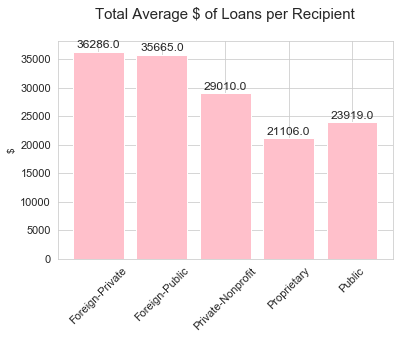

In [306]:
fig, axe = plt.subplots()
plt7 = axe.bar(df_ave_rec_pr['School Type'], round(df_ave_rec_pr['Total Average $ of Loans per Recipient']), color = 'pink')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
autolabel(plt7, axe, "center", 12)
axe.set_ylabel('$')
axe.set_title('Total Average $ of Loans per Recipient\n', fontsize=15)
plt.show()

In [227]:

min_am = df_ave_rec_pr['Total Average $ of Loans per Recipient'].min()
min_type = df_ave_rec_pr['School Type'][df_ave_rec_pr['Total Average $ of Loans per Recipient'].idxmin(axis = 0)]
max_am = df_ave_rec_pr['Total Average $ of Loans per Recipient'].max()
max_type = df_ave_rec_pr['School Type'][df_ave_rec_pr['Total Average $ of Loans per Recipient'].idxmax(axis = 0)]

print(f'\nMin Loan Amount per year is {round(min_am)} in {min_type}')
print(f'\nMax Loan Amount per year is {round(max_am)} in {max_type}')


Min Loan Amount per year is 21106.0 in Proprietary

Max Loan Amount per year is 36286.0 in Foreign-Private


In [231]:
df_copy[df_copy['School Type'] == 'Proprietary']

1,index,OPE ID,School,State,Zip Code,School Type,Recipients - DL SUBSIDIZED,# of Loans Originated - DL SUBSIDIZED,$ of Loans Originated - DL SUBSIDIZED,# of Disbursements - DL SUBSIDIZED,...,Recipients - DL PARENT PLUS,# of Loans Originated - DL PARENT PLUS,$ of Loans Originated - DL PARENT PLUS,# of Disbursements - DL PARENT PLUS,$ of Disbursements - DL PARENT PLUS,Recipients - DL GRAD PLUS,# of Loans Originated - DL GRAD PLUS,$ of Loans Originated - DL GRAD PLUS,# of Disbursements - DL GRAD PLUS,$ of Disbursements - DL GRAD PLUS
39,41,00107400,GRAND CANYON UNIVERSITY,AZ,850173030,Proprietary,16361,16369,67709194,16504,...,2005,2014,26070137,2017,13854110,224,226,3044293,232,1778267
110,115,00117700,COGSWELL POLYTECHNICAL COLLEGE,CA,951341697,Proprietary,109,109,431809,110,...,50,50,901950,51,456648,-,-,-,-,-
224,240,00140100,POST UNIVERSITY,CT,067233240,Proprietary,2072,2079,7480916,2079,...,47,47,606650,47,279466,2,2,18081,2,7691
248,264,00145900,STRAYER UNIVERSITY,DC,200052603,Proprietary,12037,12037,45263625,12037,...,27,27,218881,27,78233,170,170,2569822,170,1046562
362,378,00162800,AMERICAN ACADEMY OF ART,IL,606044302,Proprietary,147,147,654601,147,...,61,62,1485010,62,755492,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,4440,04283100,TEXAS HEALTHTECH INSTITUTE,TX,777072604,Proprietary,19,19,46543,19,...,-,-,-,-,-,-,-,-,-,-
4151,4441,04283200,DELUXE BARBER COLLEGE,TX,782172118,Proprietary,5,5,17500,5,...,-,-,-,-,-,-,-,-,-,-
4152,4442,04283300,A BETTER U BEAUTY BARBER ACADEMY,NM,871103128,Proprietary,2,2,6572,3,...,-,-,-,-,-,-,-,-,-,-
4153,4443,04283500,FALCON INSTITUTE OF HEALTH AND SCIENCE,PA,180172113,Proprietary,2,2,6297,2,...,-,-,-,-,-,-,-,-,-,-
